<h1> <b> NAIVE BAYES CLASSIFIER FOR BREAST CANCER CLASSIFICATION (FROM SCRATCH) </h1> </b> <br>

<p align="justify">
A <b> classifier </b> is a machine learning model that is used to discriminate different objects based on certain features.</p><br>

<p align="justify">
<b>A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task.</b></p><br>

<b>Bayes Theorem:</b>

\begin{equation}
P(A|B) = \frac{P(B|A) P(A)}{P(B)}
\end{equation}
<b>
$P(A|B) = $ Posterior Probability<br>
$P(B|A) = $ Likelihood Probability<br>
$P(A) = $ Prior Probability<br>
$P(B) = $ Class Probability<br>
<br>
 </b>
<p align="justify">
Using Bayes theorem, we can find the probability of A happening, given that B has occurred. Here, B is the evidence and A is the hypothesis. The assumption made here is that the predictors/features are independent. That is presence of one particular feature does not affect the other. Hence it is called naive.</p>

Bayes theorem can be rewritten as:
<br>

\begin{equation}
P(y|X) = \frac{P(X|y) P(y)}{P(X)}
\end{equation}
<br>
The variable y is the class variable/Label.
Variable X represent the parameters/features.

X is given as,

\begin{equation}
X = )
\end{equation}

<p align="justify">
Here $ x_1,x_2….x_n $ represent the features, i.e they can be mapped to outlook, temperature, humidity and windy. By substituting for X and expanding using the chain rule we get,</p>
<br>
\begin{equation}
P(y|x_1,x_2,x_3,...,x_n) = \frac{P(x_1|y) P(x_2|y) P(x_3|y)....P(x_n|y)  P(y)}{P(x_1) P(x_2) P(x_3)....P(x_n)}
\end{equation}
<br>
    
<p align="justify">
Now, you can obtain the values for each by looking at the dataset and substitute them into the equation. For all entries in the dataset, the denominator does not change, it remain static. Therefore, the denominator can be removed and a proportionality can be introduced.</p><br>

\begin{equation}
P(y|x_1,x_2,x_3,...,x_n) \propto p(y) \prod_{i=1}^n P(x_i|y)
\end{equation}
<br>

<p align="justify">
In our case, the class variable(y) has only two outcomes, yes or no. There could be cases where the classification could be multivariate. Therefore, we need to find the class y with maximum probability. </p>
<br>
    
\begin{equation}
y = argmax_y P(y) \prod_{i=1}^n P(x_i|y)
\end{equation}


We are supposing that our dataset will be coming from the Gaussian or Normal distribution so,<br>
the Naive Bayes algorithm equation will be:<br>

\begin{equation}
P(y|X) = \frac{1}{\sqrt{2\pi|\sum|}} \mathrm{e}^-0.5 A^T \sum^-1 A
\end{equation}

<b>Importing the important python libraries which will be using for the data importing, data pre-processing, data visualization and algorithm modelling from the scratch.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<b>Importing the dataset using the pandas library function read_csv()

In [2]:
raw_data = pd.read_csv("Breast_cancer_data.csv")

<b>Reviewing the imported dataset by viewing the top 5 rows.

In [3]:
raw_data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


<b>Checking the data-types of the featuers and class label of the dataset.

In [4]:
raw_data.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

<b>Describing the whole dataset(features and class label) on the descriptive statistics measures.

In [5]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean_texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean_perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean_area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean_smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
diagnosis,569.0,0.627417,0.483918,0.00000,0.00000,1.00000,1.0000,1.0000


<b>Information of the dataset in terms of the dimensionality.

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
mean_radius        569 non-null float64
mean_texture       569 non-null float64
mean_perimeter     569 non-null float64
mean_area          569 non-null float64
mean_smoothness    569 non-null float64
diagnosis          569 non-null int64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


<b>Checking whether any features is containg any NaN values. 

In [7]:
raw_data.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

<b>Visualizing the each feature on the basis of the class labels.

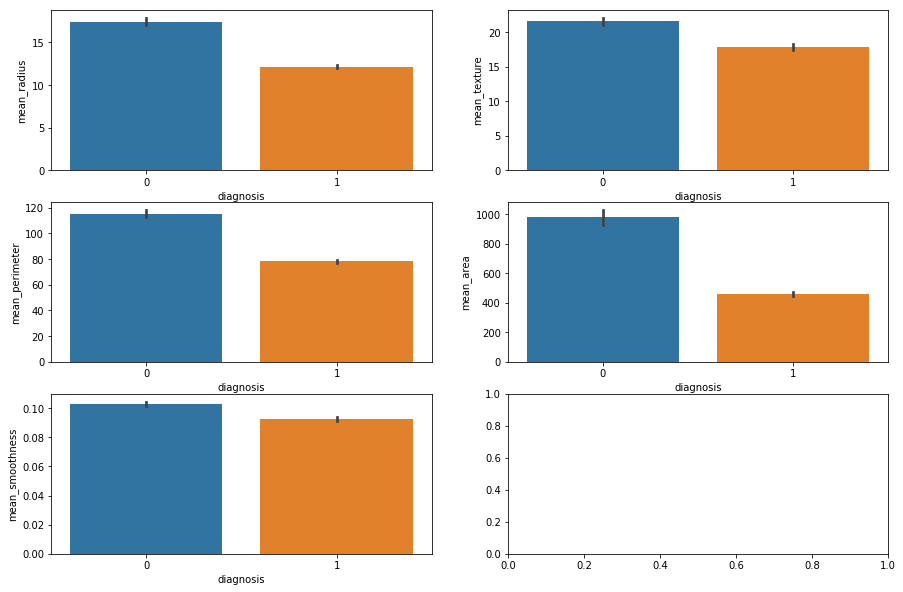

In [8]:
f, axes = plt.subplots(3, 2, figsize=(15, 10))
sns.barplot(x = raw_data['diagnosis'],y = raw_data['mean_radius'], ax=axes[0, 0])
sns.barplot(x = raw_data['diagnosis'],y = raw_data['mean_texture'], ax=axes[0, 1])
sns.barplot(x = raw_data['diagnosis'],y = raw_data['mean_perimeter'], ax=axes[1, 0])
sns.barplot(x = raw_data['diagnosis'],y = raw_data['mean_area'], ax=axes[1, 1])
sns.barplot(x = raw_data['diagnosis'],y = raw_data['mean_smoothness'], ax=axes[2, 0])

<b>Visualizing the distribuation of the each feature which is providing an inference the data is coming from the normal or Gaussian distribution

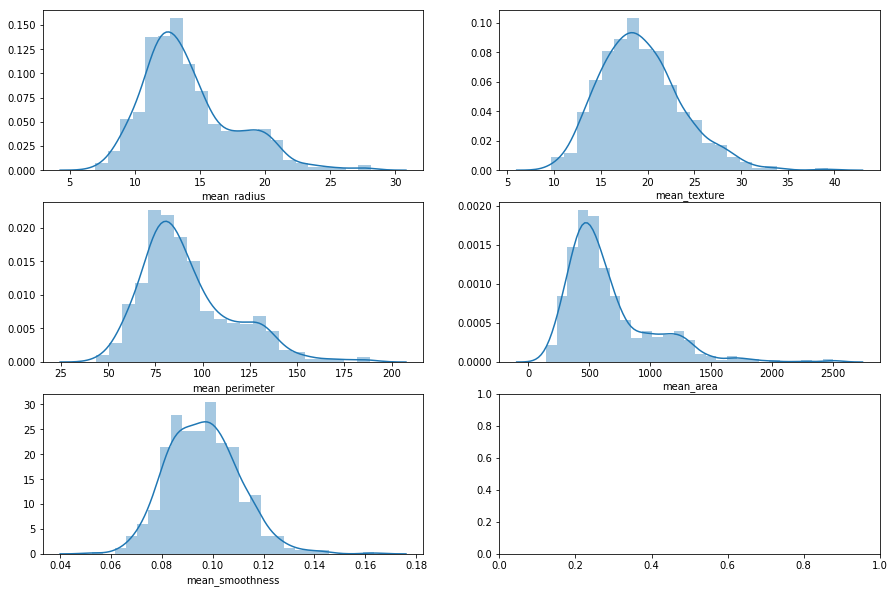

In [9]:
f, axes = plt.subplots(3, 2, figsize=(15, 10))
sns.distplot(raw_data['mean_radius'],kde= True, label = 'Mean Radius', ax=axes[0, 0])
sns.distplot(raw_data['mean_texture'],kde= True, label = 'Mean Texture', ax=axes[0, 1])
sns.distplot(raw_data['mean_perimeter'],kde= True, label = 'Mean Perimeter', ax=axes[1, 0])
sns.distplot(raw_data['mean_area'],kde= True, label = 'Mean Area', ax=axes[1, 1])
sns.distplot(raw_data['mean_smoothness'],kde= True, label = 'Mean Smoothness', ax=axes[2,0 ])


<b> Correlation between the features and visualizing using the heatmap for the better understanding of  relationships between the features

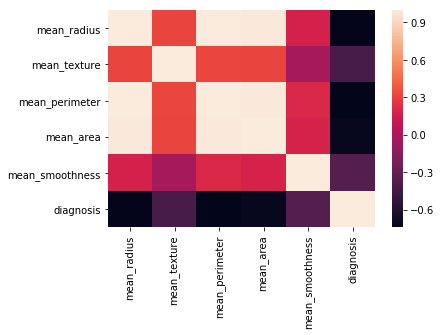

In [10]:
correlation = raw_data.corr()
sns.heatmap(correlation)

<b>Visulization of the features in the class categorization to gain the insights about the dataset.

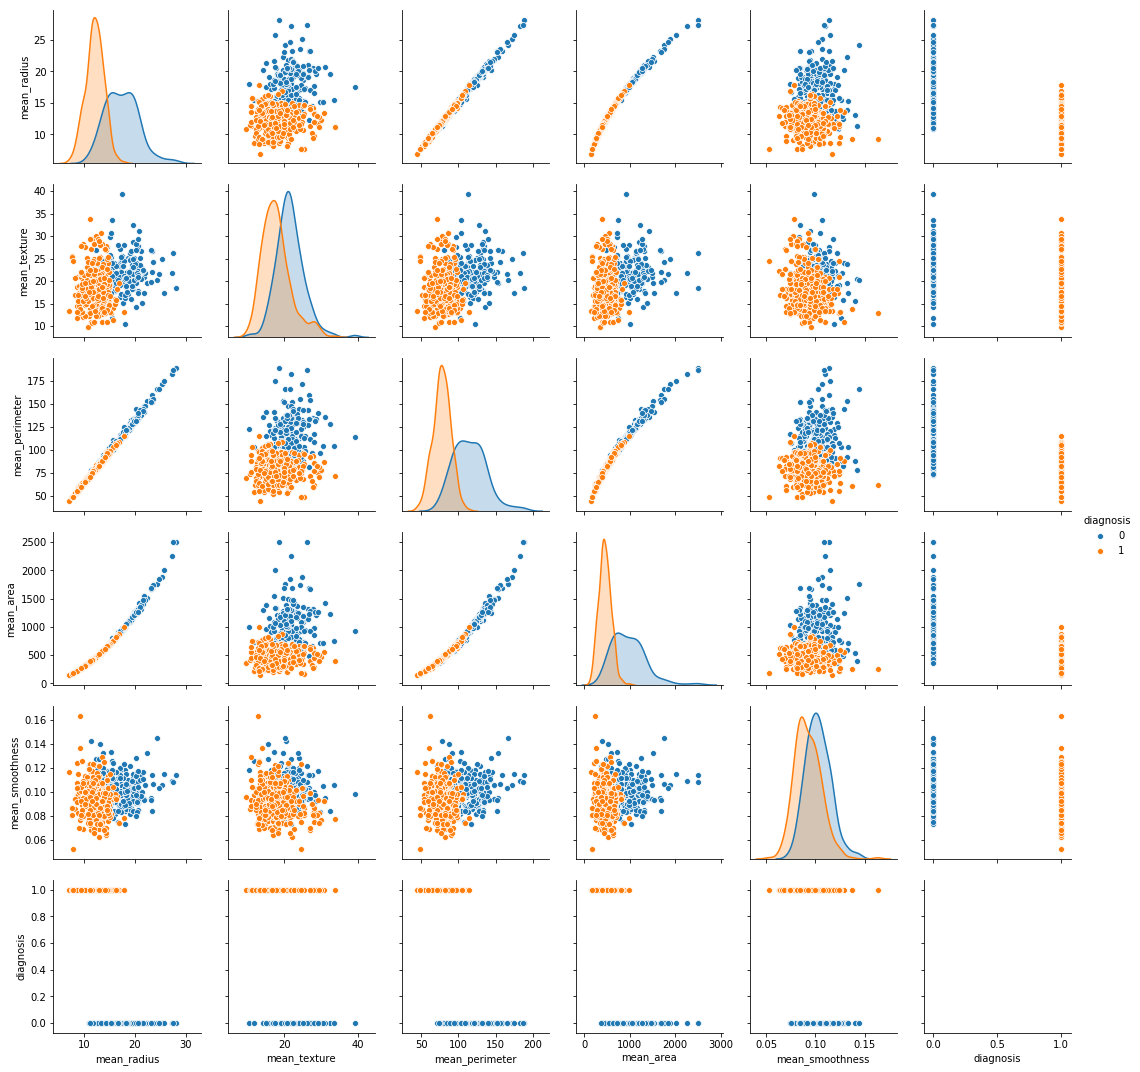

In [11]:
sns.pairplot(raw_data, kind ='scatter', hue= "diagnosis")

<b>Creating a dummy dataset from the original data.

In [12]:
Data = raw_data

<b>Using the library function for splitting of the data into the training and testing in the ratio of 7:3.

In [13]:
train, test = train_test_split(Data, test_size=0.3)

In [14]:
test_labels = test['diagnosis']

<b>The following things I have to implement the Naive Bayes for Bi-class classification problem form scratch.</b>
1. Seperarting data by class.
2. Droping the Class Label from the testing dataset.
3. I have created the function to calculate the mean vectors and covariance matrix for each class.
4. Calculating the prior probabilities of the each class.

In [15]:
#step 1
dataNC = train[train['diagnosis'] == 0]
dataC = train[train['diagnosis'] == 1]

dataNC = dataNC.drop((['diagnosis']),axis=1)
dataC = dataC.drop((['diagnosis']),axis=1)

#step 2
test = test.drop((['diagnosis']),axis=1)

#step 3
def calculate_mean_covMat(data):
    return data.mean(), np.cov(data,rowvar=0)

NC_mean, NC_cov = calculate_mean_covMat(dataNC)
C_mean, C_cov = calculate_mean_covMat(dataC)

#step 4
P_NC = dataNC.shape[0]/train.shape[0]
P_C = dataC.shape[0]/train.shape[0]

<b> The following things I have like:</b>
1. Calculating the observations from the normal/gaussian distribution.
2. Calculating the Posterior Probability for each class.

In [16]:
#step 1
def calculateObservationDistribution(test, mean, covMat):
    return st.multivariate_normal.pdf(test, mean, covMat)


#step 2
PosteriorConditionalProbabilityNC = calculateObservationDistribution(test, NC_mean, NC_cov)*P_NC
PosteriorConditionalProbabilityC = calculateObservationDistribution(test, C_mean, C_cov)*P_C

<b> The following things I have for the prediction using the testing the dataset:</b>
1. I have created the list for testing dataset which will be predicted by comparing on the Posterior Probability of the each class.
2. Loop for the comparision of the Posterior Probability for each class.
3. Converting the predicted label list into numpy array

In [17]:
# step 1
label_prediction = []

#step 2
for nc, c in zip(range(len(PosteriorConditionalProbabilityNC)), range(len(PosteriorConditionalProbabilityC))):
    if(PosteriorConditionalProbabilityNC[nc] > PosteriorConditionalProbabilityC[c]):
        label_prediction.append(0)
    else:
        label_prediction.append(1)

#step 3
label_prediction = np.array(label_prediction)

<b> Making the comparision between the Original testing data class label and predicated class labels for generating the accuracy.</b>

In [18]:
# Comapring all the rows of diagnosis of test data with label prediction
count = 0
total = len(test_labels)
for i in range(total):
    if test_labels.iloc[i] == label_prediction[i]:
        count += 1
accuracy = count/total
print('Accuracy = ' + str(accuracy*100) + '%')

Accuracy = 91.81286549707602%
